In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import scipy
import numpy.ma as ma
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import time

In [2]:
n_features = [1, 5, 10, 20, 30, 40, 50]

## APS Dataset

In [3]:
dataset_path_prefix = './Datasets/APS/Q1/'
APS_guest_full_test = pd.read_csv(dataset_path_prefix +  'APS_guest_full_test.csv', na_values = 'na', index_col = 'info')
APS_guest_full_train = pd.read_csv(dataset_path_prefix +  'APS_guest_full_train.csv', na_values = 'na', index_col = 'info')
APS_host_full_test = pd.read_csv(dataset_path_prefix +  'APS_host_full_test.csv', na_values = 'na', index_col = 'info')
APS_host_full_train = pd.read_csv(dataset_path_prefix +  'APS_host_full_train.csv', na_values = 'na', index_col = 'info')

In [4]:
# sanity check
assert(len(APS_guest_full_test) == len(APS_host_full_test))
assert(len(APS_guest_full_train) == len(APS_host_full_train))
assert(len(APS_guest_full_test.columns) == len(APS_host_full_test.columns)+1)
assert(len(APS_guest_full_train.columns) == len(APS_host_full_train.columns)+1)

In [5]:
APS_train_df = pd.concat([APS_guest_full_train, APS_host_full_train], axis = 1)
APS_test_df = pd.concat([APS_guest_full_test, APS_host_full_test], axis = 1)
print(len(APS_train_df.columns))

171


## Madelon Dataset

In [42]:
dataset_path_prefix = './Datasets/Madelon/'
Madelon_guest_full_test = pd.read_csv(dataset_path_prefix +  'Q1/Madelon_guest_full_test.csv', na_values = 'na', index_col = 'info')
Madelon_guest_full_train = pd.read_csv(dataset_path_prefix +  'Q1/Madelon_guest_full_train.csv', na_values = 'na', index_col = 'info')
Madelon_host_full_test = pd.read_csv(dataset_path_prefix +  'Madelon_host_test.csv', na_values = 'na', index_col = 'info')
Madelon_host_full_train = pd.read_csv(dataset_path_prefix +  'Madelon_host_train.csv', na_values = 'na', index_col = 'info')

In [43]:
# sanity check
assert(len(Madelon_guest_full_test) == len(Madelon_host_full_test))
assert(len(Madelon_guest_full_train) == len(Madelon_host_full_train))
assert(len(Madelon_guest_full_test.columns) == len(Madelon_host_full_test.columns)+1)
assert(len(Madelon_guest_full_train.columns) == len(Madelon_host_full_train.columns)+1)

In [44]:
Madelon_train_df = pd.concat([Madelon_guest_full_train, Madelon_host_full_train], axis = 1)
Madelon_test_df = pd.concat([Madelon_guest_full_test, Madelon_host_full_test], axis = 1)
print(len(Madelon_train_df.columns))

501


## Parkinson Dataset

In [6]:
dataset_path_prefix = './Datasets/Parkinson/Q1/'
Parkinson_guest_full_test = pd.read_csv(dataset_path_prefix +  'Parkinson_guest_full_test.csv', na_values = 'na', index_col = 'info')
Parkinson_guest_full_train = pd.read_csv(dataset_path_prefix +  'Parkinson_guest_full_train.csv', na_values = 'na', index_col = 'info')
Parkinson_host_full_test = pd.read_csv(dataset_path_prefix +  'Parkinson_host_full_test.csv', na_values = 'na', index_col = 'info')
Parkinson_host_full_train = pd.read_csv(dataset_path_prefix +  'Parkinson_host_full_train.csv', na_values = 'na', index_col = 'info')

In [7]:
# sanity check
assert(len(Parkinson_guest_full_test) == len(Parkinson_host_full_test))
assert(len(Parkinson_guest_full_train) == len(Parkinson_host_full_train))
assert(len(Parkinson_guest_full_test.columns) == len(Parkinson_host_full_test.columns)+2)
assert(len(Parkinson_guest_full_train.columns) == len(Parkinson_host_full_train.columns)+2)

In [8]:
Parkinson_train_df = pd.concat([Parkinson_guest_full_train, Parkinson_host_full_train], axis = 1)
Parkinson_test_df = pd.concat([Parkinson_guest_full_test, Parkinson_host_full_test], axis = 1)
print(len(Parkinson_train_df.columns))

754


## Gisette Dataset

In [48]:
dataset_path_prefix = './Datasets/Gisette/'
Gisette_guest_full_test = pd.read_csv(dataset_path_prefix +  'Q1/Gisette_guest_full_test.csv', na_values = 'na', index_col = 'info')
Gisette_guest_full_train = pd.read_csv(dataset_path_prefix +  'Q1/Gisette_guest_full_train.csv', na_values = 'na', index_col = 'info')
Gisette_host_full_test = pd.read_csv(dataset_path_prefix +  'Gisette_host_test.csv', na_values = 'na', index_col = 'info')
Gisette_host_full_train = pd.read_csv(dataset_path_prefix +  'Gisette_host_train.csv', na_values = 'na', index_col = 'info')

In [49]:
# sanity check
assert(len(Gisette_guest_full_test) == len(Gisette_host_full_test))
assert(len(Gisette_guest_full_train) == len(Gisette_host_full_train))
assert(len(Gisette_guest_full_test.columns) == len(Gisette_host_full_test.columns)+1)
assert(len(Gisette_guest_full_train.columns) == len(Gisette_host_full_train.columns)+1)

In [50]:
Gisette_train_df = pd.concat([Gisette_guest_full_train, Gisette_host_full_train], axis = 1)
Gisette_test_df = pd.concat([Gisette_guest_full_test, Gisette_host_full_test], axis = 1)
print(len(Gisette_train_df.columns))

5001


## Ad Dataset

In [9]:
dataset_path_prefix = './Datasets/Ad/Q1/'
Ad_guest_full_test = pd.read_csv(dataset_path_prefix +  'Ad_guest_full_test.csv', na_values = 'na', index_col = 'info')
Ad_guest_full_train = pd.read_csv(dataset_path_prefix +  'Ad_guest_full_train.csv', na_values = 'na', index_col = 'info')
Ad_host_full_test = pd.read_csv(dataset_path_prefix +  'Ad_host_full_test.csv', na_values = 'na', index_col = 'info')
Ad_host_full_train = pd.read_csv(dataset_path_prefix +  'Ad_host_full_train.csv', na_values = 'na', index_col = 'info')

In [10]:
# sanity check
assert(len(Ad_guest_full_test) == len(Ad_host_full_test))
assert(len(Ad_guest_full_train) == len(Ad_host_full_train))
assert(len(Ad_guest_full_test.columns) == len(Ad_host_full_test.columns)+1)
assert(len(Ad_guest_full_train.columns) == len(Ad_host_full_train.columns)+1)

In [11]:
Ad_train_df = pd.concat([Ad_guest_full_train, Ad_host_full_train], axis = 1)
Ad_test_df = pd.concat([Ad_guest_full_test, Ad_host_full_test], axis = 1)
print(len(Ad_train_df.columns))

1559


## p53 Dataset

In [12]:
dataset_path_prefix = './Datasets/p53/'
p53_guest_full_test = pd.read_csv(dataset_path_prefix +  'Q1/p53_guest_full_test.csv', na_values = 'na', index_col = 'info')
p53_guest_full_train = pd.read_csv(dataset_path_prefix +  'Q1/p53_guest_full_train.csv', na_values = 'na', index_col = 'info')
p53_host_full_test = pd.read_csv(dataset_path_prefix +  'p53_host_full_test.csv', na_values = 'na', index_col = 'info')
p53_host_full_train = pd.read_csv(dataset_path_prefix +  'p53_host_full_train.csv', na_values = 'na', index_col = 'info')

In [13]:
# sanity check
assert(len(p53_guest_full_test) == len(p53_host_full_test))
assert(len(p53_guest_full_train) == len(p53_host_full_train))
print(len(p53_guest_full_test.columns), len(p53_host_full_test.columns))
assert(len(p53_guest_full_test.columns)+7 == len(p53_host_full_test.columns))
assert(len(p53_guest_full_train.columns)+7 == len(p53_host_full_train.columns))

2701 2708


In [14]:
p53_train_df = pd.concat([p53_guest_full_train, p53_host_full_train], axis = 1)
p53_test_df = pd.concat([p53_guest_full_test, p53_host_full_test], axis = 1)
print(len(p53_guest_full_train.columns))

2701


## Swarm Dataset

In [26]:
dataset_path_prefix = './Datasets/Swarm/'
Swarm_guest_full_test = pd.read_csv(dataset_path_prefix +  'Q1/Swarm_guest_full_test.csv', na_values = 'na', index_col = 'info')
Swarm_guest_full_train = pd.read_csv(dataset_path_prefix +  'Q1/Swarm_guest_full_train.csv', na_values = 'na', index_col = 'info')
Swarm_host_full_test = pd.read_csv(dataset_path_prefix +  'Swarm_host_full_test.csv', na_values = 'na', index_col = 'info')
Swarm_host_full_train = pd.read_csv(dataset_path_prefix +  'Swarm_host_full_train.csv', na_values = 'na', index_col = 'info')
Swarm_guest_full_test = Swarm_guest_full_test.rename(columns={"Class": "class"})
Swarm_guest_full_train = Swarm_guest_full_train.rename(columns={"Class": "class"})

In [28]:
# sanity check
assert(len(Swarm_guest_full_test) == len(Swarm_host_full_test))
assert(len(Swarm_guest_full_train) == len(Swarm_host_full_train))
print(len(Swarm_guest_full_test.columns), len(Swarm_host_full_test.columns))
assert(len(Swarm_guest_full_test.columns) == len(Swarm_host_full_test.columns)+1)
assert(len(Swarm_guest_full_train.columns) == len(Swarm_host_full_train.columns)+1)

1201 1200


In [29]:
Swarm_train_df = pd.concat([Swarm_guest_full_train, Swarm_host_full_train], axis = 1)
Swarm_test_df = pd.concat([Swarm_guest_full_test, Swarm_host_full_test], axis = 1)
print(len(Swarm_guest_full_train.columns))

1201


## Processed Dataset List

In [30]:
dataset_list = [
    {'train_df_no_y': APS_train_df.drop('class', 1), 'train_y': APS_train_df['class'], 'test_df_no_y': APS_test_df.drop('class', 1), 'test_y': APS_test_df['class'], 'dataset_name': 'APS'},
    {'train_df_no_y': Parkinson_train_df.drop('class', 1), 'train_y': Parkinson_train_df['class'], 'test_df_no_y': Parkinson_test_df.drop('class', 1), 'test_y': Parkinson_test_df['class'], 'dataset_name': 'Parkinson'},
    {'train_df_no_y': Ad_train_df.drop('class', 1), 'train_y': Ad_train_df['class'], 'test_df_no_y': Ad_test_df.drop('class', 1), 'test_y': Ad_test_df['class'], 'dataset_name': 'Ad'},
    {'train_df_no_y': p53_train_df.drop('class', 1), 'train_y': p53_train_df['class'], 'test_df_no_y': p53_test_df.drop('class', 1), 'test_y': p53_test_df['class'], 'dataset_name': 'p53'},
    {'train_df_no_y': Swarm_train_df.drop('class', 1), 'train_y': Swarm_train_df['class'], 'test_df_no_y': Swarm_test_df.drop('class', 1), 'test_y': Swarm_test_df['class'], 'dataset_name': 'Swarm'}
]

## coefficient of variance (statistic_filter)

In [31]:
def create_cv_dfs(train_dfs, test_dfs, n_features):
    all_dfs = pd.concat([train_dfs, test_dfs])
    start = time.time()
    cv_res = scipy.stats.variation(all_dfs, nan_policy = 'omit')
    cv_res = ma.getdata(cv_res).tolist()
    
    # remove the columns that coeficient of variance is 0
    to_rm = []
    for idx in range(len(cv_res)):
        if (cv_res[idx] == 0):
            to_rm.insert(0, idx)
    for idx in to_rm:
        # print('removing column ' + str(idx) + ', because of 0 cv value')
        cv_res.pop(idx)
        train_dfs.drop(train_dfs.columns[idx] ,1)
        test_dfs.drop(test_dfs.columns[idx], 1)
    end = time.time()
    public_duration = end - start
    train_res = []
    test_res = []
    # select features with n smallest cv value (larget than 0)
    for n_feature in n_features:
        start = time.time()
        smallest_idx = sorted(range(len(cv_res)), key=lambda k: cv_res[k])[:n_feature]
        # print(smallest_idx)
        tmp = train_dfs.iloc[:, smallest_idx]
        # print('df', len(tmp.columns), len(tmp))
        train_res.append(tmp)
        test_res.append(test_dfs.iloc[:, smallest_idx])
        end = time.time()
        print('duration for feature number', n_feature, public_duration + end - start)
    return train_res, test_res

In [32]:
dataset_list_statistic_filter = []
for dataset in dataset_list: 
    print('processing dataset', dataset['dataset_name'])
    train_selected, test_selected = create_cv_dfs(dataset['train_df_no_y'], dataset['test_df_no_y'], n_features)
    dataset_list_statistic_filter.append({'train_selected': train_selected, 'train_y': dataset['train_y'], 'test_selected': test_selected, 'test_y': dataset['test_y'], 'dataset_name': dataset['dataset_name']})
assert(len(dataset_list_statistic_filter) == len(dataset_list))

processing dataset APS
duration for feature number 1 0.047364234924316406
duration for feature number 5 0.04748821258544922
duration for feature number 10 0.04745793342590332
duration for feature number 20 0.047363996505737305
duration for feature number 30 0.047396183013916016
duration for feature number 40 0.048767805099487305
duration for feature number 50 0.04873323440551758
processing dataset Parkinson
duration for feature number 1 0.011870384216308594
duration for feature number 5 0.011792182922363281
duration for feature number 10 0.011823177337646484
duration for feature number 20 0.011826038360595703
duration for feature number 30 0.01280522346496582
duration for feature number 40 0.012202024459838867
duration for feature number 50 0.0119171142578125
processing dataset Ad
duration for feature number 1 0.15565705299377441
duration for feature number 5 0.15567803382873535
duration for feature number 10 0.15614819526672363
duration for feature number 20 0.1557941436767578
duratio

## Population Stability Index (PSI filter)

In [33]:
from psi import calculate_psi

def create_psi_dfs(train_dfs, test_dfs, train_y, test_y, n_features):
    all_dfs = pd.concat([train_dfs, test_dfs])
    all_y = pd.concat([train_y, test_y])
    start = time.time()
    psi_res = []
    for column in all_dfs.columns:
        psi_res.append(calculate_psi(all_y, all_dfs[column]))
    end = time.time()
    public_duration = end - start
    train_res = []
    test_res = []
    # select features with n smallest psi value (larget than 0)
    for n_feature in n_features:
        start = time.time()
        smallest_idx = sorted(range(len(psi_res)), key=lambda k: psi_res[k])[:n_feature]
        # print(smallest_idx)
        tmp = train_dfs.iloc[:, smallest_idx]
        # print('df', len(tmp.columns), len(tmp))
        train_res.append(tmp)
        test_res.append(test_dfs.iloc[:, smallest_idx])
        end = time.time()
        print('duration for feature number', n_feature, public_duration + end - start)
    return train_res, test_res

In [34]:
dataset_list_psi_filter = []
for dataset in dataset_list: 
    print('processing dataset', dataset['dataset_name'])
    train_selected, test_selected = create_psi_dfs(train_dfs = dataset['train_df_no_y'], test_dfs = dataset['test_df_no_y'], train_y = dataset['train_y'], test_y = dataset['test_y'], n_features = n_features)
    dataset_list_psi_filter.append({'train_selected': train_selected, 'train_y': dataset['train_y'], 'test_selected': test_selected, 'test_y': dataset['test_y'], 'dataset_name': dataset['dataset_name']})
assert(len(dataset_list_psi_filter) == len(dataset_list))

processing dataset APS
duration for feature number 1 0.10738086700439453
duration for feature number 5 0.10732197761535645
duration for feature number 10 0.10758113861083984
duration for feature number 20 0.10779905319213867
duration for feature number 30 0.10783910751342773
duration for feature number 40 0.10773587226867676
duration for feature number 50 0.10884594917297363
processing dataset Parkinson
duration for feature number 1 0.24102401733398438
duration for feature number 5 0.24156999588012695
duration for feature number 10 0.24117779731750488
duration for feature number 20 0.2410900592803955
duration for feature number 30 0.24109911918640137
duration for feature number 40 0.2411487102508545
duration for feature number 50 0.24116277694702148
processing dataset Ad
duration for feature number 1 0.5877749919891357
duration for feature number 5 0.5877819061279297
duration for feature number 10 0.5927879810333252
duration for feature number 20 0.587946891784668
duration for feature 

## Percentage Value Filter

In [35]:
import heapq

def create_pct_dfs(train_dfs, test_dfs, n_features):
    all_dfs = pd.concat([train_dfs, test_dfs])
    start = time.time()
    pct_res = []
    for column in all_dfs.columns:
        pct_res.append(all_dfs[column].count())
    end = time.time()
    public_duration = end - start
    train_res = []
    test_res = []
    # select features with n largest unique value count
    for n_feature in n_features:
        # largest_idx = np.argpartition(pct_res, -1 * n_feature)[-1 * n_feature:]
        start = time.time()
        largest_idx = heapq.nlargest(n_feature, range(len(pct_res)), pct_res.__getitem__)
        #print(largest_idx)
        #print('value', np.asarray(pct_res)[largest_idx])
        tmp = train_dfs.iloc[:, largest_idx]
        #print('df', len(tmp.columns), len(tmp))
        train_res.append(tmp)
        test_res.append(test_dfs.iloc[:, largest_idx])
        end = time.time()
        print('duration for feature number', n_feature, public_duration + end - start)
    return train_res, test_res

In [36]:
dataset_list_pct_filter = []
for dataset in dataset_list: 
    print('processing dataset', dataset['dataset_name'])
    train_selected, test_selected = create_pct_dfs(dataset['train_df_no_y'], dataset['test_df_no_y'], n_features)
    dataset_list_pct_filter.append({'train_selected': train_selected, 'train_y': dataset['train_y'], 'test_selected': test_selected, 'test_y': dataset['test_y'], 'dataset_name': dataset['dataset_name']})
assert(len(dataset_list_pct_filter) == len(dataset_list))

processing dataset APS
duration for feature number 1 0.015226364135742188
duration for feature number 5 0.015277385711669922
duration for feature number 10 0.015506267547607422
duration for feature number 20 0.015740394592285156
duration for feature number 30 0.015486478805541992
duration for feature number 40 0.015647411346435547
duration for feature number 50 0.016802310943603516
processing dataset Parkinson
duration for feature number 1 0.04122185707092285
duration for feature number 5 0.04126906394958496
duration for feature number 10 0.04125475883483887
duration for feature number 20 0.041339874267578125
duration for feature number 30 0.04134202003479004
duration for feature number 40 0.04211091995239258
duration for feature number 50 0.041324615478515625
processing dataset Ad
duration for feature number 1 0.08790373802185059
duration for feature number 5 0.0879368782043457
duration for feature number 10 0.0880270004272461
duration for feature number 20 0.08816909790039062
duratio

## Train Model with XGBoost

In [37]:
params = {'eval_metric': ['logloss', 'auc'],
         'learning_rate': 0.3,
         'max_depth': 5,
         'min_child_weight': 1,
         'subsample': 0.8
}

In [38]:
def train(x_train_dfs, y_train, x_test_dfs, y_test):
    test_auc = []
    for _,(x_train_df, x_test_df) in enumerate(zip(x_train_dfs, x_test_dfs)):
        dtrain = xgb.DMatrix(x_train_df, label=y_train)
        dtest = xgb.DMatrix(x_test_df, label=y_test)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=5,
            evals=[(dtest, "Test")])
        y_predict= model.predict(dtest).astype(np.float64)
        test_auc.append(roc_auc_score(y_test, y_predict))
    return test_auc

## Method for making plot

In [39]:
def plot(test_auc, n_features, dataset_name, filter_method):
    plt.figure()
    plt.plot(n_features,test_auc, color='darkorange',lw=2)
    plt.xlabel('Number of Features')
    plt.ylabel('Test AUC')
    plt.title(dataset_name + ' Dataset with ' + filter_method)
    plt.savefig(('results/' + dataset_name + '_' + filter_method + '.png').replace(' ', '_'))
    plt.show()

## Train & Plot for statistic filter

In [40]:
test_auc_list = []
for dataset in dataset_list_statistic_filter:
    test_auc = train(dataset['train_selected'], dataset['train_y'], dataset['test_selected'], dataset['test_y'])
    test_auc_list.append({'test_auc': test_auc, 'dataset_name': dataset['dataset_name']})

[0]	Test-logloss:0.44910	Test-auc:0.92637
[1]	Test-logloss:0.31129	Test-auc:0.92663
[2]	Test-logloss:0.22714	Test-auc:0.92611
[3]	Test-logloss:0.17297	Test-auc:0.92616
[4]	Test-logloss:0.13785	Test-auc:0.92440
[0]	Test-logloss:0.44950	Test-auc:0.93615
[1]	Test-logloss:0.31085	Test-auc:0.93629
[2]	Test-logloss:0.22564	Test-auc:0.91359
[3]	Test-logloss:0.17057	Test-auc:0.91399
[4]	Test-logloss:0.13513	Test-auc:0.92492
[0]	Test-logloss:0.44978	Test-auc:0.93376
[1]	Test-logloss:0.31129	Test-auc:0.93412
[2]	Test-logloss:0.22559	Test-auc:0.91401
[3]	Test-logloss:0.17112	Test-auc:0.93815
[4]	Test-logloss:0.13584	Test-auc:0.95028
[0]	Test-logloss:0.44591	Test-auc:0.95039
[1]	Test-logloss:0.30448	Test-auc:0.95275
[2]	Test-logloss:0.21822	Test-auc:0.95107
[3]	Test-logloss:0.16286	Test-auc:0.96164
[4]	Test-logloss:0.12575	Test-auc:0.96276
[0]	Test-logloss:0.44552	Test-auc:0.90411
[1]	Test-logloss:0.30526	Test-auc:0.91742
[2]	Test-logloss:0.21850	Test-auc:0.91836
[3]	Test-logloss:0.16305	Test-auc:

In [41]:
print('test auc for statistic_filter', test_auc_list)

test auc for statistic_filter [{'test_auc': [0.9243968596266595, 0.9249191320169822, 0.950283037940562, 0.9627586090706921, 0.8938860435339309, 0.9129574095289439, 0.9360974459195364], 'dataset_name': 'APS'}, {'test_auc': [0.5748081841432225, 0.7037510656436489, 0.6747655583972719, 0.7001278772378516, 0.7103580562659846, 0.6741261722080136, 0.6840721795964764], 'dataset_name': 'Parkinson'}, {'test_auc': [0.5036829836829837, 0.8747052947052947, 0.8776490176490177, 0.9189810189810189, 0.9386813186813188, 0.9384415584415584, 0.9339593739593739], 'dataset_name': 'Ad'}, {'test_auc': [0.5992545260915868, 0.8219382321618742, 0.9145899893503727, 0.8499467518636848, 0.7585197018104366, 0.7803514376996805, 0.7759850905218317], 'dataset_name': 'p53'}, {'test_auc': [0.6242015369553662, 0.9756443732921847, 0.9914973533142737, 0.9950850373461901, 0.9965300047523485, 0.9992655170326197, 0.9993855096756306], 'dataset_name': 'Swarm'}]


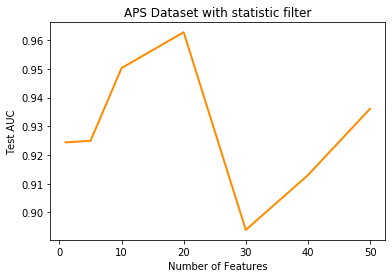

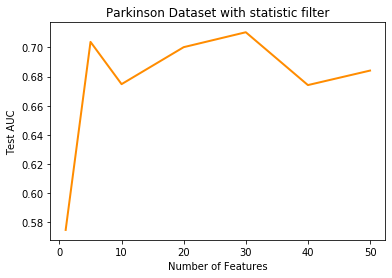

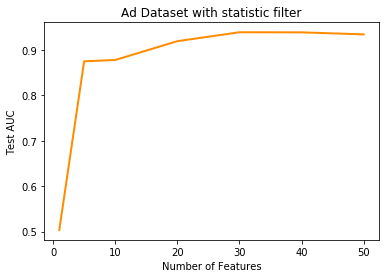

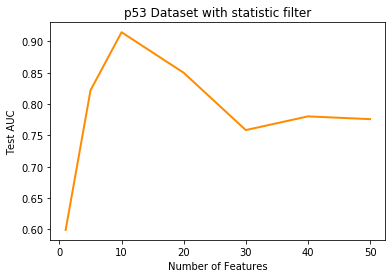

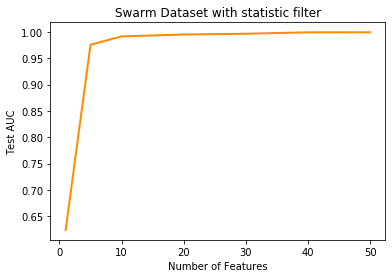

In [42]:
for test_auc in test_auc_list:
    plot(test_auc['test_auc'], n_features, test_auc['dataset_name'], 'statistic filter')

## Train & Plot for PSI filter

In [43]:
test_auc_list = []
for dataset in dataset_list_psi_filter:
    test_auc = train(dataset['train_selected'], dataset['train_y'], dataset['test_selected'], dataset['test_y'])
    test_auc_list.append({'test_auc': test_auc, 'dataset_name': dataset['dataset_name']})

[0]	Test-logloss:0.45119	Test-auc:0.61570
[1]	Test-logloss:0.31554	Test-auc:0.61558
[2]	Test-logloss:0.23315	Test-auc:0.61558
[3]	Test-logloss:0.18180	Test-auc:0.61557
[4]	Test-logloss:0.14976	Test-auc:0.61560
[0]	Test-logloss:0.44853	Test-auc:0.69231
[1]	Test-logloss:0.30908	Test-auc:0.73193
[2]	Test-logloss:0.22399	Test-auc:0.72931
[3]	Test-logloss:0.17082	Test-auc:0.72928
[4]	Test-logloss:0.13693	Test-auc:0.72928
[0]	Test-logloss:0.44824	Test-auc:0.71973
[1]	Test-logloss:0.30872	Test-auc:0.77031
[2]	Test-logloss:0.22286	Test-auc:0.79665
[3]	Test-logloss:0.16909	Test-auc:0.81756
[4]	Test-logloss:0.13470	Test-auc:0.81761
[0]	Test-logloss:0.44652	Test-auc:0.79573
[1]	Test-logloss:0.30518	Test-auc:0.85199
[2]	Test-logloss:0.21839	Test-auc:0.86542
[3]	Test-logloss:0.16351	Test-auc:0.86209
[4]	Test-logloss:0.12832	Test-auc:0.86633
[0]	Test-logloss:0.44693	Test-auc:0.81078
[1]	Test-logloss:0.30550	Test-auc:0.85859
[2]	Test-logloss:0.21937	Test-auc:0.85793
[3]	Test-logloss:0.16505	Test-auc:

In [44]:
print('test auc for psi_filter', test_auc_list)

test auc for psi_filter [{'test_auc': [0.6155990969741897, 0.7292775793517083, 0.8176090033021093, 0.8663319630702876, 0.9034975402655164, 0.94045252375497, 0.9115506435743648], 'dataset_name': 'APS'}, {'test_auc': [0.6453537936913895, 0.8048451264563796, 0.8047740835464621, 0.8860471724921853, 0.8487496447854503, 0.8520176186416596, 0.9050866723500995], 'dataset_name': 'Parkinson'}, {'test_auc': [0.5036829836829837, 0.6192007992007992, 0.8483050283050283, 0.9239160839160839, 0.9455677655677656, 0.9469064269064269, 0.9444089244089244], 'dataset_name': 'Ad'}, {'test_auc': [0.8500000000000001, 0.7761980830670927, 0.7892971246006389, 0.8858359957401492, 0.6396166134185304, 0.6567625133120341, 0.6657082002129926], 'dataset_name': 'p53'}, {'test_auc': [0.6563000489313999, 0.7733966135068326, 0.801868531836576, 0.8125415414530105, 0.8163050867025241, 0.8251025633116382, 0.8204430089982323], 'dataset_name': 'Swarm'}]


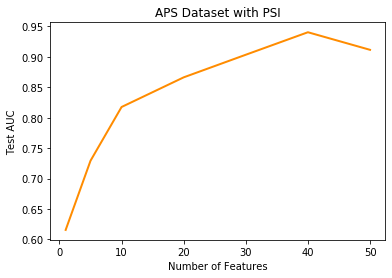

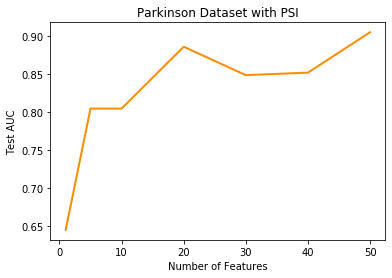

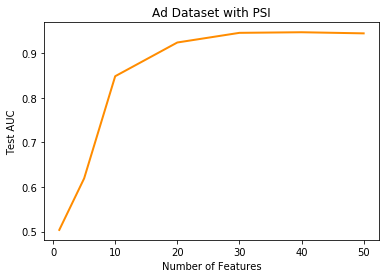

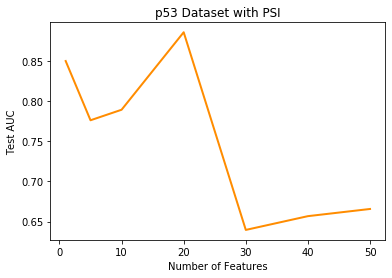

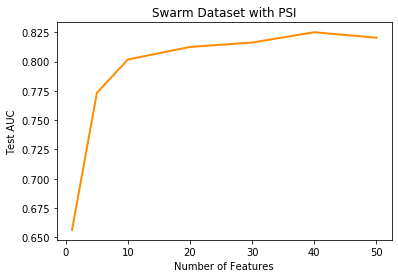

In [45]:
for test_auc in test_auc_list:
    plot(test_auc['test_auc'], n_features, test_auc['dataset_name'], 'PSI')

## Train & Plot for Percentage Value Filter

In [46]:
test_auc_list = []
for dataset in dataset_list_pct_filter:
    test_auc = train(dataset['train_selected'], dataset['train_y'], dataset['test_selected'], dataset['test_y'])
    test_auc_list.append({'test_auc': test_auc, 'dataset_name': dataset['dataset_name']})

[0]	Test-logloss:0.44545	Test-auc:0.90746
[1]	Test-logloss:0.30454	Test-auc:0.95398
[2]	Test-logloss:0.21812	Test-auc:0.95252
[3]	Test-logloss:0.16263	Test-auc:0.95368
[4]	Test-logloss:0.12715	Test-auc:0.95300
[0]	Test-logloss:0.44559	Test-auc:0.91730
[1]	Test-logloss:0.30486	Test-auc:0.91743
[2]	Test-logloss:0.21799	Test-auc:0.91741
[3]	Test-logloss:0.16327	Test-auc:0.91744
[4]	Test-logloss:0.12726	Test-auc:0.91717
[0]	Test-logloss:0.44458	Test-auc:0.89633
[1]	Test-logloss:0.30401	Test-auc:0.92061
[2]	Test-logloss:0.21763	Test-auc:0.89483
[3]	Test-logloss:0.16348	Test-auc:0.86950
[4]	Test-logloss:0.12903	Test-auc:0.89349
[0]	Test-logloss:0.44316	Test-auc:0.93505
[1]	Test-logloss:0.29946	Test-auc:0.93688
[2]	Test-logloss:0.21036	Test-auc:0.92493
[3]	Test-logloss:0.15371	Test-auc:0.97562
[4]	Test-logloss:0.11721	Test-auc:0.97555
[0]	Test-logloss:0.44308	Test-auc:0.90726
[1]	Test-logloss:0.29892	Test-auc:0.92390
[2]	Test-logloss:0.21037	Test-auc:0.91100
[3]	Test-logloss:0.15339	Test-auc:

In [47]:
print('test auc for percentage_filter', test_auc_list)

test auc for percentage_filter [{'test_auc': [0.9530039086191792, 0.9171692836444504, 0.8934901273670733, 0.9755458588853697, 0.936434395848777, 0.966641957005189, 0.8747978300424557], 'dataset_name': 'APS'}, {'test_auc': [0.6453537936913895, 0.7365728900255755, 0.7110684853651607, 0.7446717817561808, 0.790920716112532, 0.8025717533390169, 0.8015771526001705], 'dataset_name': 'Parkinson'}, {'test_auc': [0.5013986013986014, 0.5153846153846153, 0.5593806193806194, 0.5748917748917749, 0.5873459873459872, 0.5891108891108892, 0.5939726939726939], 'dataset_name': 'Ad'}, {'test_auc': [0.6664004259850905, 0.6926517571884984, 0.8626730564430245, 0.7320553780617678, 0.7282215122470714, 0.7354632587859425, 0.37300319488817896], 'dataset_name': 'p53'}, {'test_auc': [0.70225998303592, 0.9898566219107974, 0.9980640546966785, 0.9993034027097731, 0.9999399716804563, 0.9999095095481505, 0.9999203888811168], 'dataset_name': 'Swarm'}]


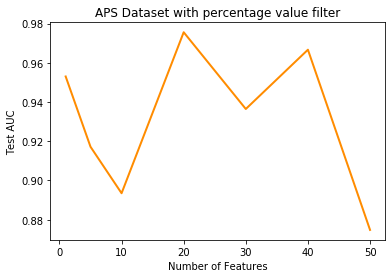

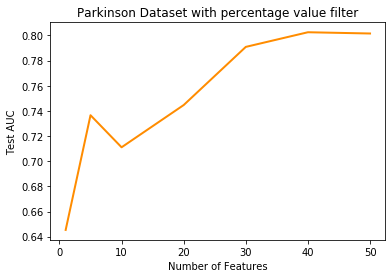

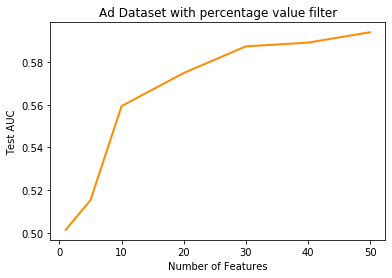

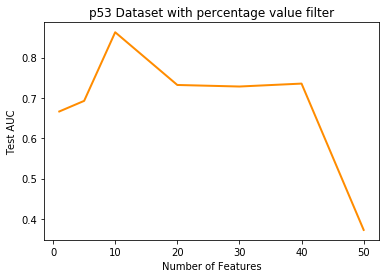

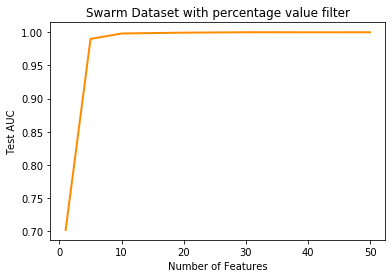

In [48]:
for test_auc in test_auc_list:
    plot(test_auc['test_auc'], n_features, test_auc['dataset_name'], 'percentage value filter')